## Import Libraries for Analysis

In [652]:
# Import Core Libraries
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for graphs
sns.set_theme(palette='bright')

### Self-Made Functions

In [653]:
def infoOut(data):
    '''
    Title: Display Dataframe of df.info
    Description: Display a pandas dataframe of df.info

    data: Pandas dataframe.
    '''
    dfInfo = data.columns.to_frame(name='Column')   # Create dataframe         
    dfInfo['Non-Null Count'] = data.notna().sum()   # Add non-null counts to dataframe
    dfInfo['NULL Count'] = data.isnull().sum()      # Add NULL counts to dataframe        
    dfInfo['Dtype'] = data.dtypes                   # add dtype to dataframe
    dfInfo.reset_index(drop=True,inplace=True)      # Reset index        
    return dfInfo                                   # display info dataframe

def nullValues(data):
    '''
    Title: Display Null values in Pandas Dataframe
    Description: Display a pandas dataframe of Null values for each column
    
    data: Pandas dataframe.
    '''
    display(data.isnull().sum().to_frame().rename(columns = {0:'NULL Amounts'}))

## Data Overview

In [654]:
# Create DataFrame to Hold data
stl_county_df = pd.read_csv('STL-County-2023.csv', low_memory=False)
stl_city_df = pd.read_csv('STL-City-2023.csv', low_memory=False)
stl_census_df = pd.read_csv('STL-Census-2023.csv', low_memory=False)

# Show DataFrame Head
print('St.Louis County')
print('-' * 20)
display(stl_county_df.head(3))

# Show DataFrame Head
print('\n\nSt. Louis City')
print('-' * 20)
display(stl_city_df.head(3))

# Show Census Data
print('\n\nSt.Louis Census')
print('-'*20)
display(stl_census_df.head(3))

St.Louis County
--------------------


,OffenseName,OffenseCategory,Report Number,reportingJuris,forJuris,address,latitude,longitude,dtCalledIntoCad,occurred,OccDOW,OccMonth,premise,zone,district
0,Destruction/Damage/Vandalism Of Property,Property,3-431,RICHMOND HEIGHTS,RICHMOND HEIGHTS,1107 EAST LINDEN,38.633600,-90.342300,2/27/2023 18:08,2/26/2003,Wed,2,CHURCH,3212,DISTRICT 3
1,Destruction/Damage/Vandalism Of Property,Property,23-1,MOLINE ACRES,MOLINE ACRES,2352 GARDNER DR,38.749906,-90.247051,1/1/2023 0:04,1/1/2023,Sun,1,RESIDENCE,1133,NaN
2,Destruction/Damage/Vandalism Of Property,Property,23-1,LAKESHIRE,LAKESHIRE,10080 SQUIRE MEADOWS DR,38.536756,-90.341975,1/2/2023 11:31,1/2/2023,Mon,1,APARTMENT PARKING LOT,3422,NaN




St. Louis City
--------------------


,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip
0,23000004,2023-01-01,21:00.0,UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...,A,520,524,5.0,38,38.646434,-90.26485,2 PORTLAND PL,NaN,Saint Louis,MO,NaN
1,23000004,2023-01-01,21:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,524,5.0,38,38.646434,-90.26485,2 PORTLAND PL,NaN,Saint Louis,MO,NaN
2,23000007,2023-01-01,10:00.0,ASSAULT 1ST DEGREE OR ATTEMPT,A,13A,425,4.0,60,38.652984,-90.20108,3001 N FLORISSANT AVE,NaN,Saint Louis,MO,NaN




St.Louis Census
--------------------


,Fact,St.Louis County,St.Louis City
0,"Population estimates, July 1, 2023, (V2023)",NaN,NaN
1,"Population Estimates, July 1, 2022, (V2022)","990,414","286,578"
2,"Population estimates base, April 1, 2020, (V2023)",NaN,NaN


### Data Information

In [655]:
### Data Information
# Show St.Louis County
print('St.Louis County')
print('-' * 20)
display(infoOut(stl_county_df))

# Show St.Louis City
print('\n\n\nSt. Louis City')
print('-' * 20)
display(infoOut(stl_city_df))

# Show St.Louis Census Data
print('\n\nSt.Louis Census')
print('-'*20)
display(infoOut(stl_census_df))

St.Louis County
--------------------


,Column,Non-Null Count,NULL Count,Dtype
0,OffenseName,35140,0,object
1,OffenseCategory,35140,0,object
2,Report Number,35140,0,object
3,reportingJuris,35140,0,object
4,forJuris,35140,0,object
5,address,34681,459,object
6,latitude,34681,459,float64
7,longitude,34681,459,float64
8,dtCalledIntoCad,35140,0,object
9,occurred,35140,0,object





St. Louis City
--------------------


,Column,Non-Null Count,NULL Count,Dtype
0,inci_id,56532,0,int64
1,date_inc,56532,0,object
2,time_inc,56532,0,object
3,offense,56532,0,object
4,nibrs_grp,56531,1,object
5,nibrs_code,56532,0,object
6,beat,56532,0,object
7,district,56532,0,float64
8,neighborhood,56532,0,object
9,latitude,56266,266,float64




St.Louis Census
--------------------


,Column,Non-Null Count,NULL Count,Dtype
0,Fact,66,0,object
1,St.Louis County,63,3,object
2,St.Louis City,63,3,object


## Data Preprocessing

### St. Louis City 

#### Map NIBRS Data to DataFrames

In [656]:
# Create NIBRS Code for Offense Map
nibrs_code_maps = {'200': 'Arson', 
                   '13A': 'Aggravated Assault',
                   '13B': 'Simple Assault',
                   '13C': 'Intimidation',
                   '510': 'Bribery',
                   '220': 'Burglary/Breaking & Entering',
                   '250': 'Counterfeiting/Forgery',
                   '290': 'Destruction/Damage/Vandalism of Property',
                   '35A': 'Drug/Narcotic Violations',
                   '35B': 'Drug Equipment Violations',
                   '270': 'Embezzlement',
                   '210': 'Extortion/Blackmail',
                   '26A': 'False Pretenses/Swindle/Confidence Game',
                   '26B': 'Credit Card/Automated Teller Machine Fraud',
                   '26C': 'Impersonation',
                   '26D': 'Welfare Fraud',
                   '26E': 'Wire Fraud',
                   '39A': 'Betting/Wagering',
                   '39B': 'Operating/Promoting/Assisting Gambling',
                   '39C': 'Gambling Equipment Violations',
                   '39D': 'Sports Tampering',
                   '09A': 'Murder & Nonnegligent Manslaughter',
                   '09B': 'Negligent Manslaughter',
                   '09C': 'Justifiable Homicide',
                   '100': 'Kidnapping/Abduction',
                   '23A': 'Pocket-picking',
                   '23B': 'Purse-snatching',
                   '23C': 'Shoplifting',
                   '23D': 'Theft From Building',
                   '23E': 'Theft From Coin-Operated Machine or Device',
                   '23F': 'Theft From Motor Vehicle',
                   '23G': 'Theft of Motor Vehicle Parts or Accessories',
                   '23H': 'All Other Larceny',
                   '240': 'Motor Vehicle Theft',
                   '370': 'Pornography/Obscene Material', 
                   '40A': 'Prostitution',
                   '40B': 'Assisting or Promoting Prostitution',
                   '120': 'Robbery',
                   '11A': 'Forcible Rape',
                   '11B': 'Forcible Sodomy',
                   '11C': 'Sexual Assault With An Object',
                   '11D': 'Forcible Fondling',
                   '36A': 'Incest',
                   '36B': 'Statutory Rape',
                   '280': 'Stolen Property Offenses',
                   '520': 'Weapon Law Violations',
                   '90A': 'Bad Checks',
                   '90B': 'Curfew/Loitering/Vagrancy Violations',
                   '90C': 'Disorderly Conduct',
                   '90D': 'Driving Under the Influence',
                   '90E': 'Drunkenness',
                   '90F': 'Family Offenses, Nonviolent',
                   '90G': 'Liquor Law Violations',
                   '90H': 'Peeping Tom',
                   '90I': 'Runaway',
                   '90J': 'Trespass of Real Property',
                   '90Z': 'All Other Offenses'}

# Create NIBRS Category Map
nibrs_category_maps = {'Arson': 'Property', 
                       'Aggravated Assault': 'Person',
                       'Simple Assault': 'Person',
                       'Intimidation': 'Person',
                       'Bribery': 'Property',
                       'Burglary/Breaking & Entering': 'Property',
                       'Counterfeiting/Forgery': 'Property',
                       'Destruction/Damage/Vandalism of Property': 'Property',
                       'Drug/Narcotic Violations': 'Society',
                       'Drug Equipment Violations': 'Society',
                       'Embezzlement': 'Property',
                       'Extortion/Blackmail': 'Property',
                       'False Pretenses/Swindle/Confidence Game': 'Property',
                       'Credit Card/Automated Teller Machine Fraud': 'Property',
                       'Impersonation': 'Property',
                       'Welfare Fraud': 'Property',
                       'Wire Fraud': 'Property',
                       'Betting/Wagering': 'Society',
                       'Operating/Promoting/Assisting Gambling': 'Society',
                       'Gambling Equipment Violations': 'Society',
                       'Sports Tampering': 'Society',
                       'Murder & Nonnegligent Manslaughter': 'Person',
                       'Negligent Manslaughter': 'Person',
                       'Justifiable Homicide': 'Person/ Not a Crime',
                       'Kidnapping/Abduction': 'Person',
                       'Pocket-picking': 'Property',
                       'Purse-snatching': 'Property',
                       'Shoplifting': 'Property',
                       'Theft From Building': 'Property',
                       'Theft From Coin-Operated Machine or Device': 'Property',
                       'Theft From Motor Vehicle': 'Property',
                       'Theft of Motor Vehicle Parts or Accessories': 'Property',
                       'All Other Larceny': 'Property',
                       'Motor Vehicle Theft': 'Property',
                       'Pornography/Obscene Material': 'Society', 
                       'Prostitution': 'Society',
                       'Assisting or Promoting Prostitution': 'Society',
                       'Robbery': 'Property',
                       'Forcible Rape': 'Person',
                       'Forcible Sodomy': 'Person',
                       'Sexual Assault With An Object': 'Person',
                       'Forcible Fondling': 'Person',
                       'Incest': 'Person',
                       'Statutory Rape': 'Person',
                       'Stolen Property Offenses': 'Property',
                       'Weapon Law Violations': 'Society',
                       'Bad Checks': 'Property',
                       'Curfew/Loitering/Vagrancy Violations': 'Society',
                       'Disorderly Conduct': 'Society',
                       'Driving Under the Influence': 'Society',
                       'Drunkenness': 'Society',
                       'Family Offenses, Nonviolent': 'Society',
                       'Liquor Law Violations': 'Society',
                       'Peeping Tom': 'Society',
                       'Runaway': 'Not a Crime',
                       'Trespass of Real Property': 'Society',
                       'All Other Offenses': 'Person, Property, or Society'}

stl_city_districts_maps = { 1.0: 'South Patrol Division',
                            2.0: 'South Patrol Division',
                            3.0: 'Central Patrol Division',
                            4.0: 'Central Patrol Division',
                            5.0: 'North Patrol Division',
                            6.0: 'North Patrol Division'}


# Map Codes to Values for Offenses & Offense Categories
stl_city_df['OffenseName'] = stl_city_df['nibrs_code'].map(nibrs_code_maps)
stl_city_df['OffenseCategory'] = stl_city_df['OffenseName'].map(nibrs_category_maps)
stl_city_df['Patrol District'] = stl_city_df['district'].map(stl_city_districts_maps)

# Show Updated DataFrame
display(stl_city_df.head(3))

,inci_id,date_inc,time_inc,offense,nibrs_grp,nibrs_code,beat,district,neighborhood,latitude,longitude,incidentlocation,locationStreet2_Apt,city,state,zip,OffenseName,OffenseCategory,Patrol District
0,23000004,2023-01-01,21:00.0,UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...,A,520,524,5.0,38,38.646434,-90.26485,2 PORTLAND PL,NaN,Saint Louis,MO,NaN,Weapon Law Violations,Society,North Patrol Division
1,23000004,2023-01-01,21:00.0,PROPERTY DAMAGE - 2ND DEGREE,A,290,524,5.0,38,38.646434,-90.26485,2 PORTLAND PL,NaN,Saint Louis,MO,NaN,Destruction/Damage/Vandalism of Property,Property,North Patrol Division
2,23000007,2023-01-01,10:00.0,ASSAULT 1ST DEGREE OR ATTEMPT,A,13A,425,4.0,60,38.652984,-90.20108,3001 N FLORISSANT AVE,NaN,Saint Louis,MO,NaN,Aggravated Assault,Person,Central Patrol Division


#### Clean Time_inc

In [657]:
# Only accept Hours and Minutes Ex: 12:00
stl_city_df['time_inc'] = stl_city_df['time_inc'].astype(str).str[:5]

# Add Second format to the end of time
stl_city_df['time_inc'] = stl_city_df['time_inc'] + ':00'

##### Obersvations-
* As we can see, we have WAY more than just the standard 00:00.0-23:59.9. This was most likely an error of putting in the time. So we are going to have to use a timedelta which will add the hours over 24:00 to the next day and get the time.


#### Convert To DateTime Format

In [658]:
# Make Datetime the date plus the time difference in hours if the hours are over 24.
stl_city_df['Datetime'] = (pd.to_datetime(stl_city_df['date_inc'], format='%Y-%m-%d') + pd.to_timedelta(stl_city_df['time_inc']))

# Show Correct Time of Crimes
stl_city_df['Datetime'].astype(str).str[10:16].unique()

array([' 21:00', ' 10:00', ' 15:00', ' 00:00', ' 20:00', ' 06:00',
       ' 11:00', ' 09:00', ' 01:00', ' 08:00', ' 12:00', ' 16:00',
       ' 02:00', ' 05:00', ' 23:00', ' 03:00', ' 17:00', ' 19:00',
       ' 14:00', ' 07:00', ' 13:00', ' 18:00', ' 04:00', ' 22:00'],
      dtype=object)

##### Observations-
* We can see that the hours for the crimes are now all under 24 and we have a datetime format!

#### Consolidate Columns 

In [659]:
# Rename Columns
stl_city_df['City'] = stl_city_df['city']
stl_city_df['State'] = stl_city_df['state']
stl_city_df['District'] = stl_city_df['district']
stl_city_df['Latitude'] = stl_city_df['latitude']
stl_city_df['Longitude'] = stl_city_df['longitude']
stl_city_df['Address'] = stl_city_df['incidentlocation']


# Remove unnecessary columns
stl_city_df = stl_city_df.drop(columns=['inci_id','date_inc','time_inc', 
                                        'offense','nibrs_grp', 'nibrs_code',
                                        'beat','neighborhood', 'city', 'state',
                                        'locationStreet2_Apt', 'zip', 'longitude', 
                                        'latitude', 'district', 'incidentlocation'])

# Restructure Format of Columns
stl_city_df = stl_city_df.loc[:,['Datetime','OffenseName', 'OffenseCategory', 'Latitude', 
                                 'Longitude' ,'Address', 'City', 'State', 'District', 'Patrol District']]

# Sort by Datetime and Reset Index
stl_city_df = stl_city_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Show new Clean DataFrame
display(stl_city_df)

,Datetime,OffenseName,OffenseCategory,Latitude,Longitude,Address,City,State,District,Patrol District
0,2023-01-01 00:00:00,Motor Vehicle Theft,Property,38.607462,-90.272190,4988 REBER PL,Saint Louis,MO,2.0,South Patrol Division
1,2023-01-01 00:00:00,Theft of Motor Vehicle Parts or Accessories,Property,38.620859,-90.268340,1375 S KINGSHIGHWAY BLVD,Saint Louis,MO,2.0,South Patrol Division
2,2023-01-01 00:00:00,Theft of Motor Vehicle Parts or Accessories,Property,38.540744,-90.265115,8512 S BROADWAY,Saint Louis,MO,1.0,South Patrol Division
3,2023-01-01 00:00:00,Destruction/Damage/Vandalism of Property,Property,38.604695,-90.296200,3208 WATSON RD,Saint Louis,MO,2.0,South Patrol Division
4,2023-01-01 00:00:00,Theft From Building,Property,38.606641,-90.223440,2615 VICTOR ST,Saint Louis,MO,3.0,Central Patrol Division
...,...,...,...,...,...,...,...,...,...,...
56527,2024-01-02 07:00:00,Drug/Narcotic Violations,Society,38.568874,-90.255650,3632 BATES ST,Saint Louis,MO,1.0,South Patrol Division
56528,2024-01-02 08:00:00,Weapon Law Violations,Society,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
56529,2024-01-02 08:00:00,Destruction/Damage/Vandalism of Property,Property,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
56530,2024-01-02 11:00:00,Destruction/Damage/Vandalism of Property,Property,38.644940,-90.274655,UNION BLVD,Saint Louis,MO,6.0,North Patrol Division


### St. Louis County

In [660]:
stl_county_df

,OffenseName,OffenseCategory,Report Number,reportingJuris,forJuris,address,latitude,longitude,dtCalledIntoCad,occurred,OccDOW,OccMonth,premise,zone,district
0,Destruction/Damage/Vandalism Of Property,Property,3-431,RICHMOND HEIGHTS,RICHMOND HEIGHTS,1107 EAST LINDEN,38.633600,-90.342300,2/27/2023 18:08,2/26/2003,Wed,2,CHURCH,3212,DISTRICT 3
1,Destruction/Damage/Vandalism Of Property,Property,23-1,MOLINE ACRES,MOLINE ACRES,2352 GARDNER DR,38.749906,-90.247051,1/1/2023 0:04,1/1/2023,Sun,1,RESIDENCE,1133,NaN
2,Destruction/Damage/Vandalism Of Property,Property,23-1,LAKESHIRE,LAKESHIRE,10080 SQUIRE MEADOWS DR,38.536756,-90.341975,1/2/2023 11:31,1/2/2023,Mon,1,APARTMENT PARKING LOT,3422,NaN
3,Destruction/Damage/Vandalism Of Property,Property,23-2,MOLINE ACRES,MOLINE ACRES,9838 EDGEFIELD DR,38.748386,-90.250623,1/1/2023 1:42,1/1/2023,Sun,1,STREET/HIGHWAY/SIDEWALK/ALLEY,1133,NaN
4,Destruction/Damage/Vandalism Of Property,Property,23-3,OVERLAND,OVERLAND,9116 LACKLAND RD,38.699600,-90.358434,1/1/2023 2:03,1/1/2023,Sun,1,PARKING LOT/GARAGE (NOT RESIDENTIAL),2200,SECTOR 103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35135,Forcible Sex Offenses,Person,23-38975,SAINT LOUIS COUNTY,SAINT LOUIS COUNTY,NaN,NaN,NaN,10/5/2023 10:42,10/4/2023,Wed,10,RESIDENCE,5281,WEST COUNTY PRECINCT
35136,Forcible Sex Offenses,Person,23-42800,SAINT LOUIS COUNTY,VALLEY PARK,NaN,NaN,NaN,11/2/2023 5:33,11/2/2023,Thu,11,RESIDENCE,5050,WEST COUNTY PRECINCT
35137,Forcible Sex Offenses,Person,23-3556,OVERLAND,OVERLAND,NaN,NaN,NaN,12/8/2023 9:00,8/13/2023,Sun,8,RESIDENCE,2260,SECTOR 101
35138,Forcible Sex Offenses,Person,23-4274,SAINT LOUIS COUNTY,WILDWOOD,NaN,NaN,NaN,1/31/2023 14:02,6/1/2010,Tue,6,RESIDENCE,5244,CITY OF WILDWOOD PRECINCT


#### Convert to DateTime Format

In [661]:
# Convert the data it was called in to DateTime Format
stl_county_df['Datetime'] = pd.to_datetime(stl_county_df['dtCalledIntoCad'])

# Show the times
stl_county_df['Datetime'].head(3)

0   2023-02-27 18:08:00
1   2023-01-01 00:04:00
2   2023-01-02 11:31:00
Name: Datetime, dtype: datetime64[ns]

#### Consolidate Columns 

In [662]:
stl_county_df.columns

Index(['OffenseName', 'OffenseCategory', 'Report Number', 'reportingJuris',
       'forJuris', 'address', 'latitude', 'longitude', 'dtCalledIntoCad',
       'occurred', 'OccDOW', 'OccMonth', 'premise', 'zone', 'district',
       'Datetime'],
      dtype='object')

In [663]:
# Rename Columns
stl_county_df['State'] = 'MO'
stl_county_df['City'] = stl_county_df['forJuris']
stl_county_df['Address'] = stl_county_df['address']
stl_county_df['Patrol District'] = stl_county_df['district']
stl_county_df['Latitude'] = stl_county_df['latitude']
stl_county_df['Longitude'] = stl_county_df['longitude']

# Drop Unnecessary Columns
stl_county_df = stl_county_df.drop(columns=['Report Number', 'reportingJuris', 'forJuris',
                                            'address', 'latitude','longitude', 'dtCalledIntoCad',
                                            'occurred','OccDOW','OccMonth','premise', 'zone', 'district'])

# ReStructure Columns
stl_county_df = stl_county_df.loc[:,['Datetime','OffenseName', 'OffenseCategory', 'Latitude', 
                                     'Longitude' ,'Address', 'City', 'State', 'Patrol District']]

# Sort DataFrame by Datetime
stl_county_df = stl_county_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Show Cleaned DataFrame
display(stl_county_df)

,Datetime,OffenseName,OffenseCategory,Latitude,Longitude,Address,City,State,Patrol District
0,2023-01-01 00:04:00,Destruction/Damage/Vandalism Of Property,Property,38.749906,-90.247051,2352 GARDNER DR,MOLINE ACRES,MO,NaN
1,2023-01-01 00:08:00,Destruction/Damage/Vandalism Of Property,Property,38.730861,-90.256748,2460 SHANNON AVE,JENNINGS,MO,CITY OF JENNINGS PRECINCT
2,2023-01-01 00:14:00,Destruction/Damage/Vandalism Of Property,Property,38.796647,-90.276259,12543 BIELEFELD CT,BLACK JACK,MO,NORTH COUNTY PRECINCT
3,2023-01-01 00:17:00,Weapon Law Violations,Society,38.702187,-90.353775,2439 GOTHLAND AVE,OVERLAND,MO,SECTOR 103
4,2023-01-01 00:18:00,Destruction/Damage/Vandalism Of Property,Property,38.823901,-90.347436,2102 MILLVALLEY DR,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT
...,...,...,...,...,...,...,...,...,...
35135,2023-12-31 21:10:00,Larceny,Property,38.748874,-90.253394,2202 CHAMBERS RD,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT
35136,2023-12-31 21:47:00,"Aggravated Assault, Hands/Feet/Fists",Person,38.645681,-90.556947,1511 BAXTER LANE CT,CHESTERFIELD,MO,DISTRICT 4
35137,2023-12-31 23:15:00,Destruction/Damage/Vandalism Of Property,Property,38.722865,-90.304584,1790 S FLORISSANT RD,COOL VALLEY,MO,NaN
35138,2023-12-31 23:25:00,Destruction/Damage/Vandalism Of Property,Property,38.826100,-90.344852,2135 KINGSFORD DR,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT


## Exploritory Data Analysis

### Cleaned DataFrames

In [664]:
# Show St. Louis City 
print('St. Louis City')
print('-' * 20)
display(stl_city_df)

# Show St. Louis County
print('\n\nSt. Louis County')
print('-' * 20)
display(stl_county_df)

St. Louis City
--------------------


,Datetime,OffenseName,OffenseCategory,Latitude,Longitude,Address,City,State,District,Patrol District
0,2023-01-01 00:00:00,Motor Vehicle Theft,Property,38.607462,-90.272190,4988 REBER PL,Saint Louis,MO,2.0,South Patrol Division
1,2023-01-01 00:00:00,Theft of Motor Vehicle Parts or Accessories,Property,38.620859,-90.268340,1375 S KINGSHIGHWAY BLVD,Saint Louis,MO,2.0,South Patrol Division
2,2023-01-01 00:00:00,Theft of Motor Vehicle Parts or Accessories,Property,38.540744,-90.265115,8512 S BROADWAY,Saint Louis,MO,1.0,South Patrol Division
3,2023-01-01 00:00:00,Destruction/Damage/Vandalism of Property,Property,38.604695,-90.296200,3208 WATSON RD,Saint Louis,MO,2.0,South Patrol Division
4,2023-01-01 00:00:00,Theft From Building,Property,38.606641,-90.223440,2615 VICTOR ST,Saint Louis,MO,3.0,Central Patrol Division
...,...,...,...,...,...,...,...,...,...,...
56527,2024-01-02 07:00:00,Drug/Narcotic Violations,Society,38.568874,-90.255650,3632 BATES ST,Saint Louis,MO,1.0,South Patrol Division
56528,2024-01-02 08:00:00,Weapon Law Violations,Society,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
56529,2024-01-02 08:00:00,Destruction/Damage/Vandalism of Property,Property,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
56530,2024-01-02 11:00:00,Destruction/Damage/Vandalism of Property,Property,38.644940,-90.274655,UNION BLVD,Saint Louis,MO,6.0,North Patrol Division




St. Louis County
--------------------


,Datetime,OffenseName,OffenseCategory,Latitude,Longitude,Address,City,State,Patrol District
0,2023-01-01 00:04:00,Destruction/Damage/Vandalism Of Property,Property,38.749906,-90.247051,2352 GARDNER DR,MOLINE ACRES,MO,NaN
1,2023-01-01 00:08:00,Destruction/Damage/Vandalism Of Property,Property,38.730861,-90.256748,2460 SHANNON AVE,JENNINGS,MO,CITY OF JENNINGS PRECINCT
2,2023-01-01 00:14:00,Destruction/Damage/Vandalism Of Property,Property,38.796647,-90.276259,12543 BIELEFELD CT,BLACK JACK,MO,NORTH COUNTY PRECINCT
3,2023-01-01 00:17:00,Weapon Law Violations,Society,38.702187,-90.353775,2439 GOTHLAND AVE,OVERLAND,MO,SECTOR 103
4,2023-01-01 00:18:00,Destruction/Damage/Vandalism Of Property,Property,38.823901,-90.347436,2102 MILLVALLEY DR,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT
...,...,...,...,...,...,...,...,...,...
35135,2023-12-31 21:10:00,Larceny,Property,38.748874,-90.253394,2202 CHAMBERS RD,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT
35136,2023-12-31 21:47:00,"Aggravated Assault, Hands/Feet/Fists",Person,38.645681,-90.556947,1511 BAXTER LANE CT,CHESTERFIELD,MO,DISTRICT 4
35137,2023-12-31 23:15:00,Destruction/Damage/Vandalism Of Property,Property,38.722865,-90.304584,1790 S FLORISSANT RD,COOL VALLEY,MO,NaN
35138,2023-12-31 23:25:00,Destruction/Damage/Vandalism Of Property,Property,38.826100,-90.344852,2135 KINGSFORD DR,SAINT LOUIS COUNTY,MO,NORTH COUNTY PRECINCT


### Concatenate DataFrames

In [665]:
# Concatenate DataFrames
stl_crime_df = pd.concat([stl_city_df, stl_county_df])

# Sort DataFrame by Datetime
stl_crime_df = stl_crime_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Display Merged DataFrames
display(stl_crime_df)

,Datetime,OffenseName,OffenseCategory,Latitude,Longitude,Address,City,State,District,Patrol District
0,2023-01-01 00:00:00,Motor Vehicle Theft,Property,38.607462,-90.272190,4988 REBER PL,Saint Louis,MO,2.0,South Patrol Division
1,2023-01-01 00:00:00,Destruction/Damage/Vandalism of Property,Property,38.629904,-90.192264,411 N 8TH STREET,Saint Louis,MO,4.0,Central Patrol Division
2,2023-01-01 00:00:00,Motor Vehicle Theft,Property,38.629904,-90.192264,411 N 8TH STREET,Saint Louis,MO,4.0,Central Patrol Division
3,2023-01-01 00:00:00,Theft of Motor Vehicle Parts or Accessories,Property,38.580073,-90.284780,5175 GOETHE AVE,Saint Louis,MO,1.0,South Patrol Division
4,2023-01-01 00:00:00,Intimidation,Person,38.637207,-90.213445,2601 DELMAR,Saint Louis,MO,4.0,Central Patrol Division
...,...,...,...,...,...,...,...,...,...,...
91667,2024-01-02 07:00:00,Drug/Narcotic Violations,Society,38.568874,-90.255650,3632 BATES ST,Saint Louis,MO,1.0,South Patrol Division
91668,2024-01-02 08:00:00,Weapon Law Violations,Society,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
91669,2024-01-02 08:00:00,Destruction/Damage/Vandalism of Property,Property,38.661501,-90.218463,3644 NATURAL BRIDGE AVE,Saint Louis,MO,4.0,Central Patrol Division
91670,2024-01-02 11:00:00,Weapon Law Violations,Society,38.682091,-90.272244,5738 GOODFELLOW PL,Saint Louis,MO,5.0,North Patrol Division


In [666]:
infoOut(stl_crime_df)

,Column,Non-Null Count,NULL Count,Dtype
0,Datetime,91672,0,datetime64[ns]
1,OffenseName,91554,118,object
2,OffenseCategory,91554,118,object
3,Latitude,90947,725,float64
4,Longitude,90947,725,float64
5,Address,91213,459,object
6,City,91672,0,object
7,State,91672,0,object
8,District,56532,35140,float64
9,Patrol District,84894,6778,object


Text(0.5, 1.0, 'Top 10 Offenses')

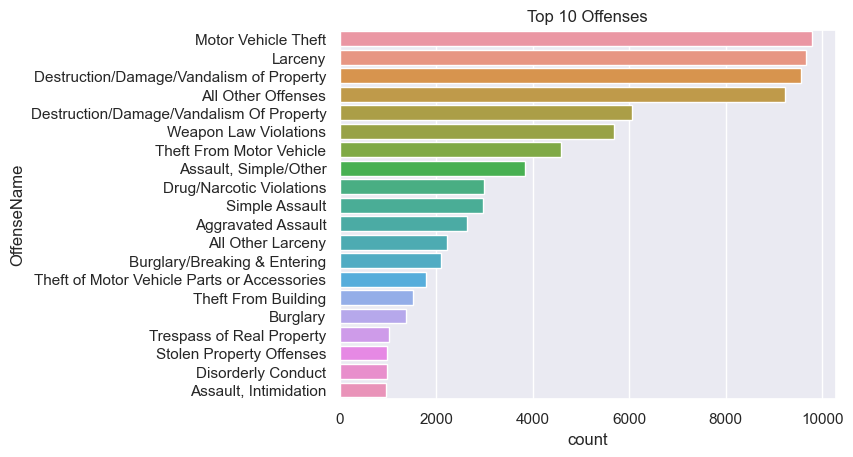

In [709]:
# Create DataFrame of OffenseNames
stl_offense_df = pd.DataFrame(stl_crime_df['OffenseName'].value_counts().reset_index())

sns.barplot(data=stl_offense_df.head(20),
            y='OffenseName',
            x='count', orient='h')

plt.title('Top 10 Offenses')

,OffenseCategory,count
0,Property,55527
1,Person,14434
2,Society,12348
3,"Person, Property, or Society",9239
4,Person/ Not a Crime,6


<Axes: xlabel='count', ylabel='OffenseCategory'>

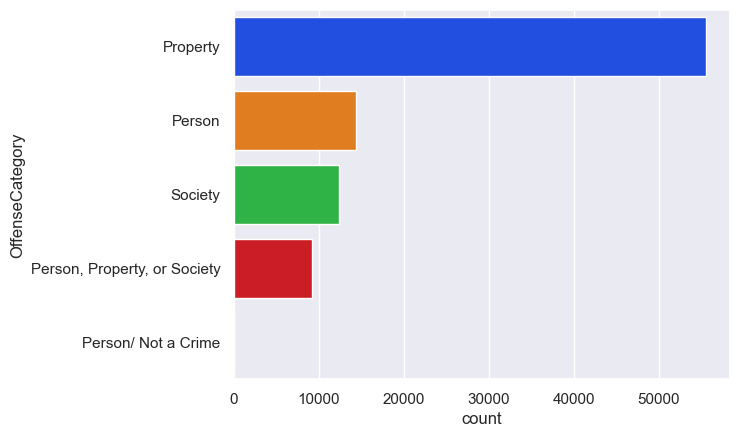

In [711]:
stl_offenseCat_df = pd.DataFrame(stl_crime_df['OffenseCategory'].value_counts().reset_index())

display(stl_offenseCat_df)

sns.barplot(data=stl_offenseCat_df.head(20),
            y='OffenseCategory',
            x='count', orient='h')


St. Louis City
--------------------
['Simple Assault' 'Aggravated Assault']


St. Louis County
--------------------
['Assault, Simple/Other' 'Aggravated Assault, Hands/Feet/Fists'
 'Aggravated Assault, Firearm' 'Aggravated Assault, Other Weapon'
 'Assault, Intimidation' 'Aggravated Assault, Knife/Cutting Instrument']


,OffenseName,count
0,"Assault, Simple/Other",3846
1,Simple Assault,2967
2,Aggravated Assault,2638
3,"Assault, Intimidation",970
4,"Aggravated Assault, Firearm",930
5,"Aggravated Assault, Hands/Feet/Fists",557
6,"Aggravated Assault, Other Weapon",501
7,"Aggravated Assault, Knife/Cutting Instrument",189


<Axes: xlabel='count', ylabel='OffenseName'>

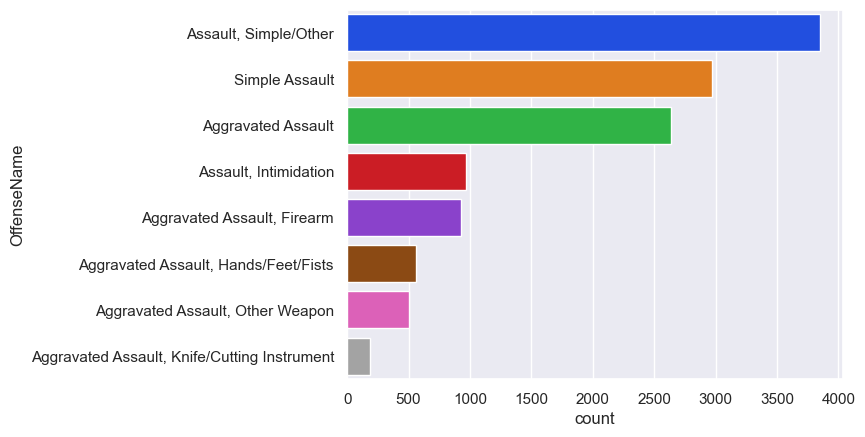

In [764]:
offenseName = 'Assault'

print('St. Louis City')
print('-'*20)
print(stl_city_df[stl_city_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].unique())

print('\n\nSt. Louis County')
print('-'*20)
print(stl_county_df[stl_county_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].unique())

,OffenseName,count
0,"Assault, Simple/Other",3846
1,Simple Assault,2967
2,Aggravated Assault,2638
3,"Assault, Intimidation",970
4,"Aggravated Assault, Firearm",930
5,"Aggravated Assault, Hands/Feet/Fists",557
6,"Aggravated Assault, Other Weapon",501
7,"Aggravated Assault, Knife/Cutting Instrument",189


<Axes: xlabel='count', ylabel='OffenseName'>

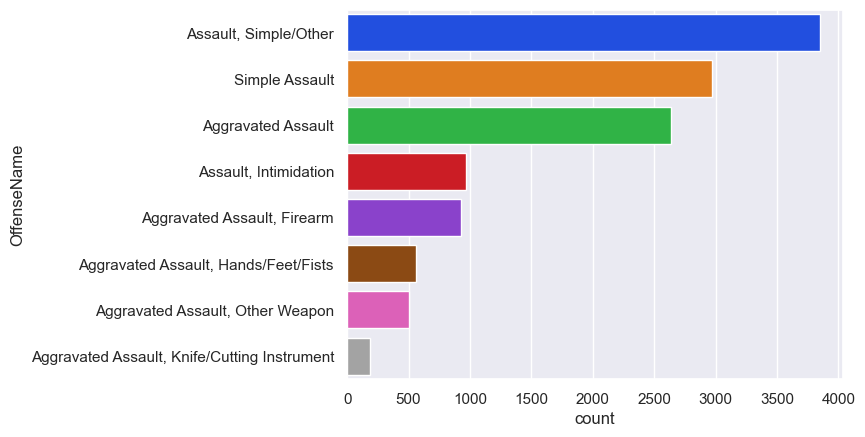

In [765]:
display(stl_crime_df[stl_crime_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].value_counts().reset_index())



sns.barplot(data=stl_crime_df[stl_crime_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].value_counts().reset_index(),
            y='OffenseName',
            x='count', orient='h')

,City,count
0,Saint Louis,55832
2,JENNINGS,2052
3,RICHMOND HEIGHTS,1353
4,CHESTERFIELD,1272
5,MAPLEWOOD,1017
6,KIRKWOOD,926
7,OVERLAND,851
8,BELLEFONTAINE NBRS,848
9,BRENTWOOD,622
10,CREVE COEUR,619


<Axes: xlabel='count', ylabel='City'>

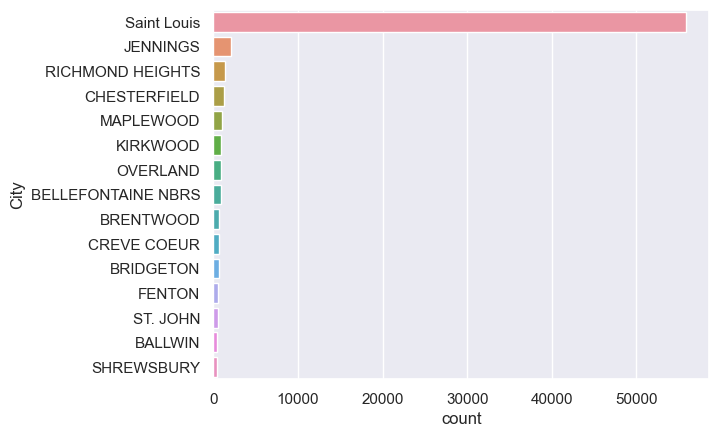

In [792]:
stl_crime_city_df = pd.DataFrame(stl_crime_df['City'].value_counts().reset_index())
display(stl_crime_city_df.loc[stl_crime_city_df['City'] != 'SAINT LOUIS COUNTY'].head(15))

sns.barplot(data=stl_crime_city_df.loc[stl_crime_city_df['City'] != 'SAINT LOUIS COUNTY'].head(15),
            y='City',
            x='count', orient='h')

,Patrol District,count
0,Central Patrol Division,20999
1,North Patrol Division,18040
2,South Patrol Division,17417
3,NORTH COUNTY PRECINCT,7689
4,SOUTH COUNTY PRECINCT,3253
5,CENTRAL COUNTY PRECINCT,2849
6,AFFTON SOUTHWEST PRECINCT,2255
7,CITY OF JENNINGS PRECINCT,2052
8,DISTRICT 1,1127
9,DISTRICT 2,1086


<Axes: xlabel='count', ylabel='Patrol District'>

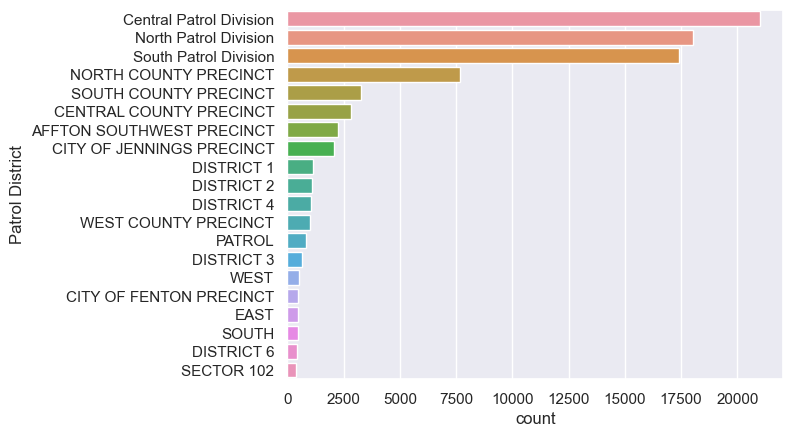

In [776]:
stl_crime_district_df = pd.DataFrame(stl_crime_df['Patrol District'].value_counts().reset_index())
display(stl_crime_district_df)

sns.barplot(data=stl_crime_district_df.head(20),
            y='Patrol District',
            x='count', orient='h')